## Reduced Rank Regression

In [13]:
import os, sys
import pickle as pkl
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

sys.path.append(os.path.join(os.getcwd(), 'utils'))

from utils.data_loading import *
from utils.data_processing import *
from utils.regression import *
from utils.animation import *
from utils.metrics import *
from utils.pipeline import *

# autoreload
%reload_ext autoreload
%autoreload 2

# ignore warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Remove deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Define the data path and filename
data_path = os.path.join(os.getcwd(), 'data')
filename = 'ssp585_time_series.pkl'

# Preprocess the data
data, nan_mask = preprocess_data(data_path, filename)

Loading data from ssp585_time_series.pkl
Data loaded successfully.
Filtering data...


100%|██████████| 72/72 [00:00<00:00, 25995.51it/s]


Data filtered. Kept 34 models
Creating NaN mask...


100%|██████████| 34/34 [00:02<00:00, 15.20it/s]


NaN mask created.
Masking out NaN values...


100%|██████████| 34/34 [00:01<00:00, 26.37it/s]


NaN values masked out.
Reshaping data...


100%|██████████| 34/34 [00:03<00:00,  8.79it/s]


Data reshaped.
Adding the forced response to the data...


100%|██████████| 34/34 [00:03<00:00,  9.30it/s]


Forced response added.
Removing NaN values from the grid...


100%|██████████| 34/34 [00:01<00:00, 31.27it/s]


NaN values removed.


In [3]:
# Define the lambda values to test
# lambdas = [0.01, 0.1, 1, 10, 50, 100, 200]
# ranks = [1, 2, 5, 10, 50, 100]
lambdas = [1, 100]
ranks = [2, 10]

In [4]:
# Only keep 8 random models for the sake of time
random.seed(42)
models = random.sample(list(data.keys()), 3)
subset_data = {model: data[model] for model in models}
print(f"Models kept to test the pipeline: {models}")

Models kept to test the pipeline: ['GISS-E2-2-G', 'EC-Earth3', 'ACCESS-ESM1-5']


In [5]:
# Perform leave-one-out cross-validation
mse_distributions = loo_cross_validation(subset_data, lambdas, ranks)

  0%|          | 0/3 [00:00<?, ?it/s]

Normalizing data...


100%|██████████| 1/1 [00:00<00:00, 22.66it/s]


Data normalization completed.
Pooling data...


100%|██████████| 2/2 [00:00<00:00, 62601.55it/s]


Data pooled.
Performing leave-one-out cross-validation for model: GISS-E2-2-G
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 2.
The mean of B_rr is 7.962749406194526e-05 and the std is 0.023286546870693727.
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 2.
The mean of B_rr is 8.51617412290028e-05 and the std is 0.0040547746595879855.
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 10.
The mean of B_rr is 8.154857772172038e-05 and the std is 0.032804339646000324.
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 10.
The mean of B_rr is 8.680048450957985e-05 and the std is 0.005305234375570923.


 33%|███▎      | 1/3 [03:41<07:22, 221.16s/it]

Normalizing data...


100%|██████████| 1/1 [00:00<00:00,  8.53it/s]


Data normalization completed.
Pooling data...


100%|██████████| 2/2 [00:00<00:00, 19373.23it/s]


Data pooled.
Performing leave-one-out cross-validation for model: EC-Earth3
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 2.
The mean of B_rr is 6.690513298012918e-05 and the std is 0.02361938104103076.
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 2.
The mean of B_rr is 7.140706569934282e-05 and the std is 0.003732522134679419.
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 10.
The mean of B_rr is 6.802730476845418e-05 and the std is 0.03632698969373135.
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 10.
The mean of B_rr is 7.241259519947243e-05 and the std is 0.0050598339662860725.


 67%|██████▋   | 2/3 [06:57<03:26, 206.34s/it]

Normalizing data...


100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


Data normalization completed.
Pooling data...


100%|██████████| 2/2 [00:00<00:00, 62601.55it/s]


Data pooled.
Performing leave-one-out cross-validation for model: ACCESS-ESM1-5
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 2.
The mean of B_rr is 6.721843602595936e-05 and the std is 0.02566496799600566.
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 2.
The mean of B_rr is 7.475960980421855e-05 and the std is 0.003979304505847363.
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 10.
The mean of B_rr is 6.749057995081271e-05 and the std is 0.041370043775971.
Fitting OLS...
RRR completed.
Is B_rr sparse: False
The rank of Bols is 328 and the rank of B_rr is 10.
The mean of B_rr is 7.506361834296748e-05 and the std is 0.005509791475300027.


100%|██████████| 3/3 [09:36<00:00, 192.12s/it]


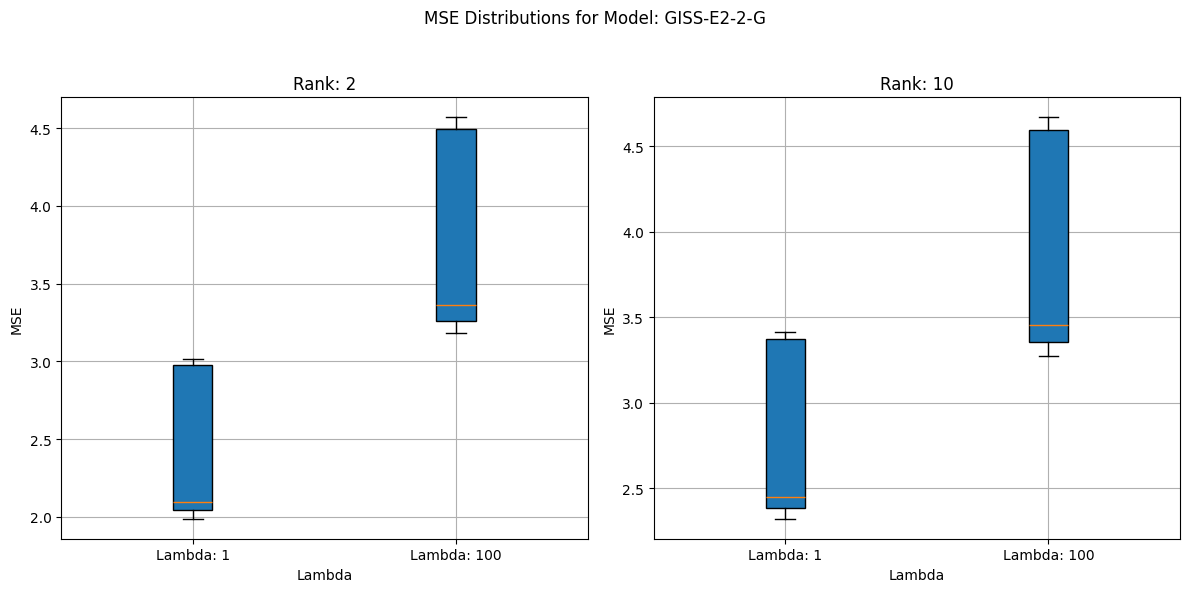

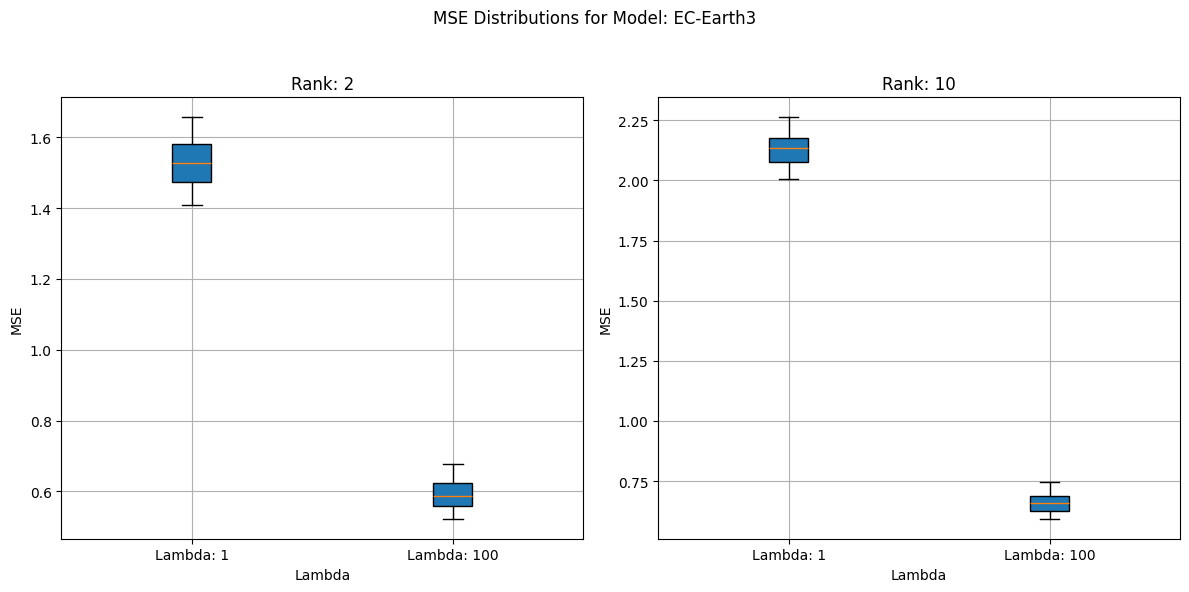

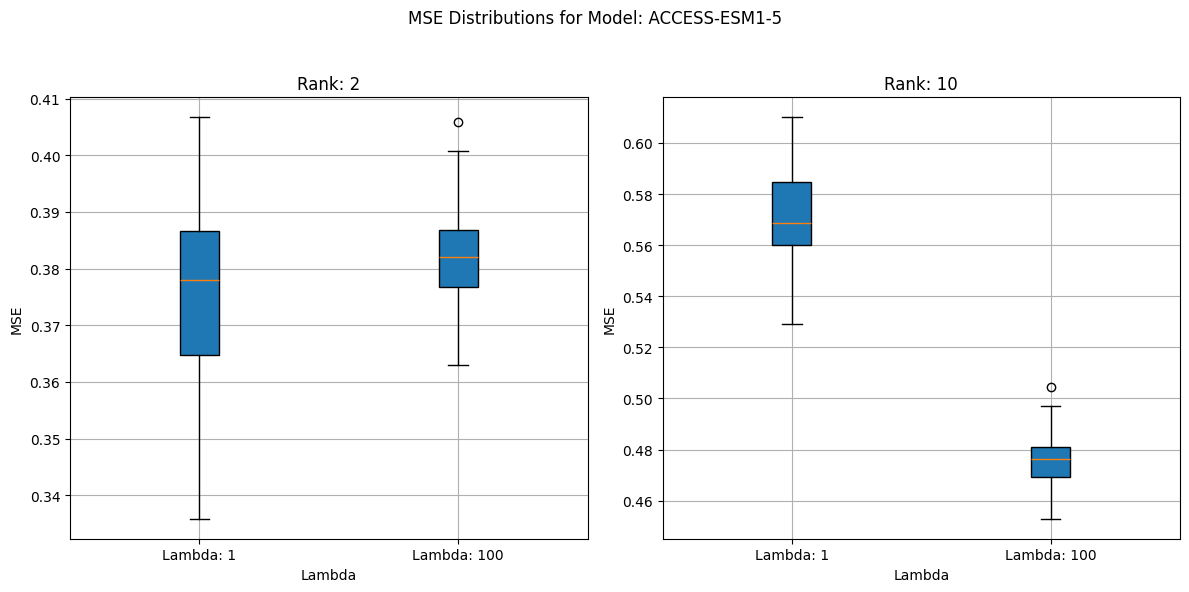

In [ ]:
# Plot the MSE distributions for each model using boxplots
for model in models:
    plt.figure(figsize=(12, 6))
    for i, rank in enumerate(ranks):
        plt.subplot(1, len(ranks), i + 1)
        data_to_plot = [mse_distributions[model][rank][lambda_] for lambda_ in lambdas]
        plt.boxplot(data_to_plot, labels=[f'Lambda: {lambda_}' for lambda_ in lambdas], patch_artist=True)
        plt.xlabel('Lambda')
        plt.ylabel('MSE')
        plt.title(f'Rank: {rank}')
        plt.grid(True)
    plt.suptitle(f'MSE Distributions for Model: {model}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [7]:
# Calculate the best rank and lambda overall
best_rank = None
best_lambda = None
best_mse = float('inf')

# Collect all MSEs for each rank and lambda across all models
rank_lambda_mses = {rank: {lambda_: [] for lambda_ in lambdas} for rank in ranks}
for model in models:
    for rank in ranks:
        for lambda_ in lambdas:
            rank_lambda_mses[rank][lambda_].extend(mse_distributions[model][rank][lambda_])

# Find the rank and lambda with the lowest mean MSE
for rank, lambda_mses in rank_lambda_mses.items():
    for lambda_, mse_values in lambda_mses.items():
        mean_mse = np.mean(mse_values)
        if mean_mse < best_mse:
            best_mse = mean_mse
            best_rank = rank
            best_lambda = lambda_

print(f"Best rank: {best_rank}, Best lambda: {best_lambda}, MSE: {best_mse:.4f}")

Best rank: 2, Best lambda: 100, MSE: 0.9593


In [8]:
test_model = random.choice(models)
train_models = [model for model in models if model != test_model]
train_data = {model: data[model] for model in train_models}
test_data = {test_model: data[test_model]}

normalized_train_data, normalized_test_data, _, _ = normalize_data(train_data, test_data)

X_train, Y_train = pool_data(normalized_train_data)

Normalizing data...


100%|██████████| 1/1 [00:00<00:00, 24.24it/s]


Data normalization completed.
Pooling data...


100%|██████████| 2/2 [00:00<00:00, 43690.67it/s]


Data pooled.


In [9]:
# Perform reduced rank regression
B_rrr, _ = reduced_rank_regression(X_train, Y_train, rank=best_rank, lambda_=best_lambda)

Fitting OLS...
RRR completed.


Model: GISS-E2-2-G, Run: r1i1p1f1, MSE: 3.181982899972165
Model: GISS-E2-2-G, Run: r1i1p3f1, MSE: 4.434654046054916
Model: GISS-E2-2-G, Run: r2i1p1f1, MSE: 3.2263454948096717
Model: GISS-E2-2-G, Run: r2i1p3f1, MSE: 4.469102214074819
Model: GISS-E2-2-G, Run: r3i1p1f1, MSE: 3.3043894664183346
Model: GISS-E2-2-G, Run: r3i1p3f1, MSE: 4.519648064484307
Model: GISS-E2-2-G, Run: r4i1p1f1, MSE: 3.2980105840886282
Model: GISS-E2-2-G, Run: r4i1p3f1, MSE: 4.548875760863809
Model: GISS-E2-2-G, Run: r5i1p1f1, MSE: 3.361793797635583
Model: GISS-E2-2-G, Run: r5i1p3f1, MSE: 4.568836770280372
Model: GISS-E2-2-G, Run: r6i1p1f1, MSE: 3.212699370791152


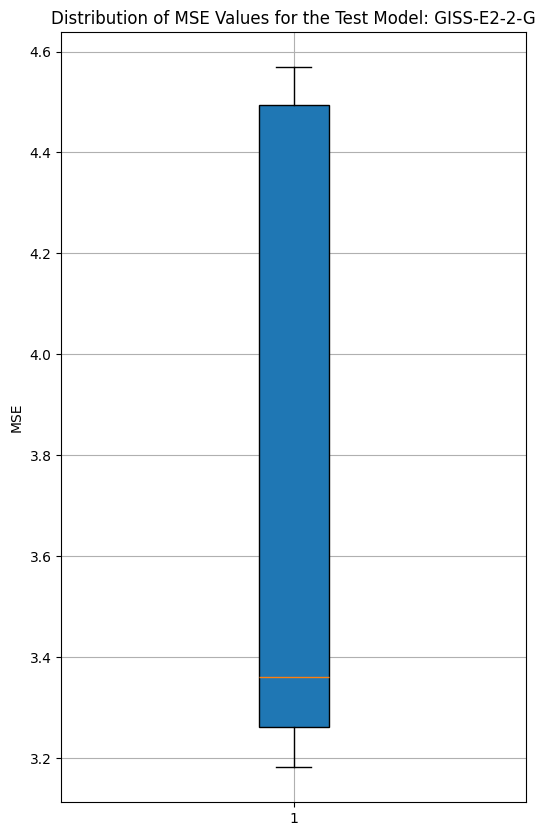

Run chosen for visualization: r2i1p3f1, for the testing model: GISS-E2-2-G.
Re-adding NaN values to the grid...
Re-adding NaN values to the grid...
Re-adding NaN values to the grid...
Random timestamp: 35


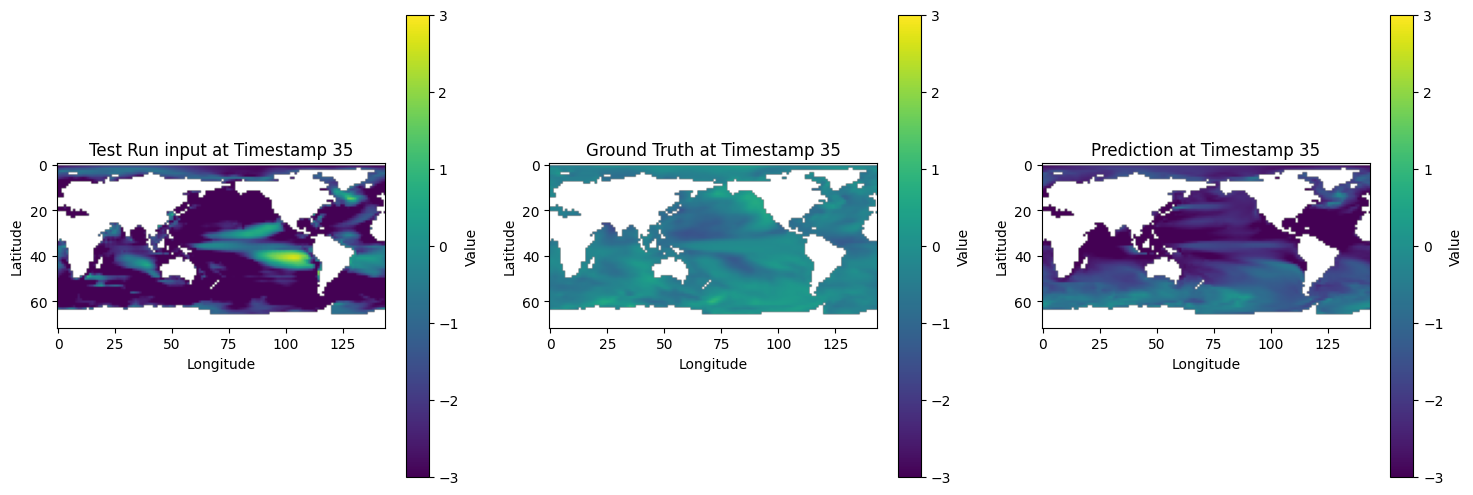

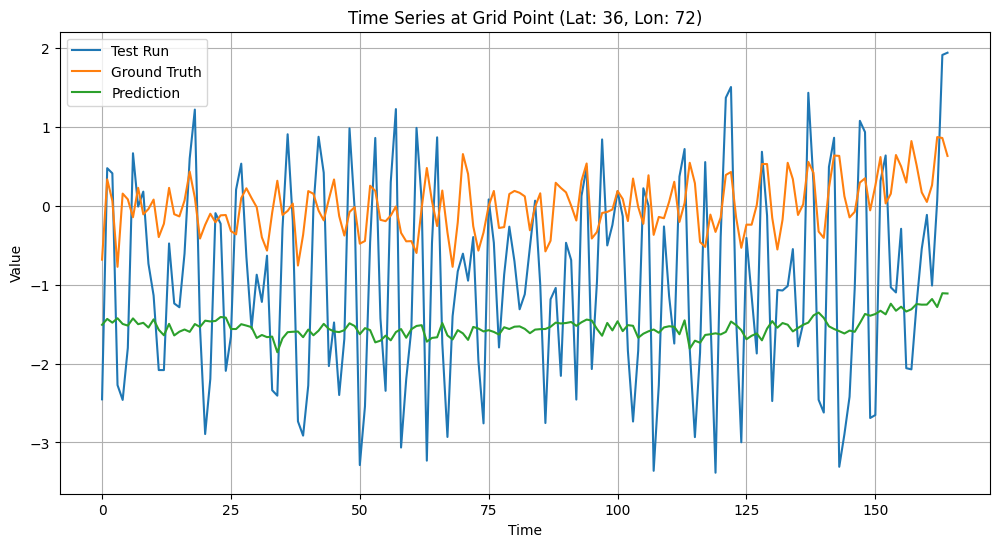

In [10]:
# Calculate the MSE for each test run
test_model_mse = []
predictions = []
i = 0
for run in normalized_test_data[test_model]:
    if run == 'forced_response':
        continue
    test_run = normalized_test_data[test_model][run]
    ground_truth = normalized_test_data[test_model]['forced_response']
    run_mse = calculate_mse(test_run, B_rrr, ground_truth)
    test_model_mse.append(run_mse)
    prediction = test_run @ B_rrr  # Use test_run @ B_ols for the OLS prediction
    predictions.append(prediction)
    print(f"Model: {test_model}, Run: {run}, MSE: {run_mse}")

# Plot the distribution of the MSE values
plt.figure(figsize=(6, 10))
plt.boxplot(test_model_mse, vert=True, patch_artist=True)
plt.ylabel('MSE')
plt.title(f'Distribution of MSE Values for the Test Model: {test_model}')
plt.grid(True)
plt.show()


# Add the NaNs back to the grid for the predictions
run_list = [run for run in normalized_test_data[test_model].keys() if run != 'forced_response']
random_test_run = random.choice(run_list)
random_test_run_data = normalized_test_data[test_model][random_test_run]
ground_truth = normalized_test_data[test_model]['forced_response']
print(f"Run chosen for visualization: {random_test_run}, for the testing model: {test_model}.")
predictions = random_test_run_data @ B_rrr
predictions_with_nans = readd_nans_to_grid(predictions, nan_mask, predictions=True)
test_run_with_nans = readd_nans_to_grid(random_test_run_data, nan_mask, predictions=True)
ground_truth_with_nans = readd_nans_to_grid(ground_truth, nan_mask, predictions=True)

# Plot a random timestamp for the target and prediction
random_timestamp = random.randint(0, predictions_with_nans.shape[0] - 1)
print(f"Random timestamp: {random_timestamp}")

# Data for the target
# Reshape the data to the original grid shape
test_run_grid = test_run_with_nans[random_timestamp, :].reshape(72, 144)
ground_truth_grid = ground_truth_with_nans[random_timestamp, :].reshape(72, 144)
prediction_grid = predictions_with_nans[random_timestamp, :].reshape(72, 144)

# Plot the data using plt.imshow
plt.figure(figsize=(18, 6))

# Plot the test run
plt.subplot(1, 3, 1)
plt.imshow(test_run_grid, cmap='viridis', vmin=-3, vmax=3)  # Added consistent limits
plt.colorbar(label='Value')
plt.title(f'Test Run input at Timestamp {random_timestamp}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Plot the ground truth (forced response)
plt.subplot(1, 3, 2)
plt.imshow(ground_truth_grid, cmap='viridis', vmin=-3, vmax=3)  # Added consistent limits
plt.colorbar(label='Value')
plt.title(f'Ground Truth at Timestamp {random_timestamp}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Plot the prediction
plt.subplot(1, 3, 3)
plt.imshow(prediction_grid, cmap='viridis', vmin=-3, vmax=3)  # Added consistent limits
plt.colorbar(label='Value')
plt.title(f'Prediction at Timestamp {random_timestamp}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

# Choose a random grid point close to the middle and plot the time series
chosen_lat = 36  # Close to the middle latitude
chosen_lon = 72  # Close to the middle longitude
# Extract the time series for the chosen grid point
test_run_series = test_run_with_nans.reshape(-1, 72, 144)[:, chosen_lat, chosen_lon]
ground_truth_series = ground_truth_with_nans.reshape(-1, 72, 144)[:, chosen_lat, chosen_lon]
prediction_series = predictions_with_nans.reshape(-1, 72, 144)[:, chosen_lat, chosen_lon]

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(test_run_series, label='Test Run')
plt.plot(ground_truth_series, label='Ground Truth')
plt.plot(prediction_series, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Time Series at Grid Point (Lat: {chosen_lat}, Lon: {chosen_lon})')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
num_runs = 5  # Number of runs to plot - adjust as needed
color_limits = (-3, 3)  # Adjust color limits for better visualization
plot_animations(test_model, normalized_test_data, B_rrr, nan_mask, num_runs, color_limits=color_limits)

Re-adding NaN values to the grid...
Re-adding NaN values to the grid...
Re-adding NaN values to the grid...


Re-adding NaN values to the grid...
Re-adding NaN values to the grid...
Re-adding NaN values to the grid...


Re-adding NaN values to the grid...
Re-adding NaN values to the grid...
Re-adding NaN values to the grid...


Re-adding NaN values to the grid...
Re-adding NaN values to the grid...
Re-adding NaN values to the grid...


Re-adding NaN values to the grid...
Re-adding NaN values to the grid...
Re-adding NaN values to the grid...
